In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import xgboost as xgb

In [32]:
train_df = pd.read_csv(
    "/Users/xiaotonghe/Downloads/mnist-flask/data/train.csv")
test_df = pd.read_csv("/Users/xiaotonghe/Downloads/mnist-flask/data/test.csv")


sc = StandardScaler()
X_std = sc.fit_transform(train_df.values[:, 1:])
y = train_df.values[:, 0]

test_std = sc.fit_transform(test_df.values)

X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.1)
# param_list = [("eta", 0.08), ("max_depth", 6), ("subsample", 0.8), ("colsample_bytree", 0.8), ("objective",
#                                                                                                "multi:softmax"), ("eval_metric", "merror"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
# n_rounds = 100
# early_stopping = 50

# d_train = xgb.DMatrix(X_train, label=y_train)
# d_val = xgb.DMatrix(X_valid, label=y_valid)
# eval_list = [(d_train, "train"), (d_val, "validation")]
# bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list,
#                 early_stopping_rounds=early_stopping, verbose_eval=True)


In [31]:
# import pickle
# file_name = "xgb_reg.pkl"

# # save
# pickle.dump(bst, open(file_name, "wb"))

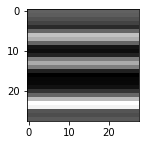

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (2,10)
x = imread('output.png')
x = test_std[4]
# re = resize(x,(28,28))
imgplot = plt.imshow(re, cmap='gray')

plt.show()


In [3]:
import pickle
model = pickle.load(open('xgb_reg.pkl', "rb"))

In [39]:
# output image
from matplotlib.pyplot import imread
from skimage.transform import resize
x = imread('output.png')
# x = np.invert(x)
x = resize(x,(28,28,1))
x = np.array(x).reshape((1, -1))
x = xgb.DMatrix(x)
out = int(model.predict(x))
out

8

In [43]:
# predict from test set
num = test_std[10]
num = np.array(num).reshape((1,-1))
num = xgb.DMatrix(num)
y_pred = model.predict(num)
int(y_pred)

5

In [42]:
im = imread('output.png')
im = resize(im,(28,28,1))
im = np.array(im).reshape((1,-1))
im.shape

(1, 784)